In [ ]:
# DON'T FORGET TO ACTIVATE THE GPU when on google colab (Edit > Notebook settings)

from os import environ
GOOGLE_COLAB = True if "COLAB_GPU" in environ else False
if GOOGLE_COLAB:
    !pip install git+https://github.com/undark-lab/swyft

In [21]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
DEVICE = swyft.set_device(gpu=True)
MAX_EPOCHS = 10
EXPECTED_N = 4000

In [23]:
def simulator(z):
    return np.array([z[0],2*(z[1]-z[0])])

def noise(x, z = None, noise=0.01):
    n = np.random.randn(*x.shape)*noise
    return x + n

z0 = np.array([0.55,0.45])
zdim = len(z0)
x0 = simulator(z0)  # Using Asimov data

In [24]:
points, re = swyft.run(x0, simulator, zdim = 2, noise = noise, device = DEVICE, n_train = 10000,n_rounds=4)

Simulate:   3%|▎         | 254/10130 [00:00<00:03, 2531.90it/s]

Creating new cache.
Adding 10130 new samples. Run simulator!


Simulate: 100%|██████████| 10130/10130 [00:03<00:00, 3349.20it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 81.17628039419651
Validation loss: 67.8767089098692
Validation loss: 81.7000178694725
Total epochs: 3
LR iteration 1
Validation loss: 59.36603429913521
Validation loss: 64.18275535106659
Total epochs: 2


Simulate:   4%|▎         | 347/9850 [00:00<00:02, 3469.95it/s]

Constrained posterior area: 0.024681208475869142
Adding 9850 new samples. Run simulator!


Simulate: 100%|██████████| 9850/9850 [00:02<00:00, 3461.19it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 223.22702407836914
Validation loss: 209.69738364219666
Validation loss: 218.15765929222107
Total epochs: 3
LR iteration 1
Validation loss: 188.76324820518494
Validation loss: 181.22933149337769
Validation loss: 186.3328024148941
Total epochs: 3


Simulate: 100%|██████████| 1/1 [00:00<00:00, 981.81it/s]

Constrained posterior area: 0.024679009121765166
Adding 1 new samples. Run simulator!
yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0


Validation loss: 221.89023804664612
Validation loss: 194.33360624313354
Validation loss: 183.99872159957886
Validation loss: 186.7439614534378
Total epochs: 4
LR iteration 1
Validation loss: 166.89694786071777
Validation loss: 168.17933118343353
Total epochs: 2


Simulate:  15%|█▍        | 325/2191 [00:00<00:00, 3244.33it/s]

Constrained posterior area: 0.01939485435579798
Adding 2191 new samples. Run simulator!


Simulate: 100%|██████████| 2191/2191 [00:00<00:00, 3230.79it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 246.90356302261353
Validation loss: 222.6565546989441
Validation loss: 187.84751760959625
Validation loss: 194.60736227035522
Total epochs: 4
LR iteration 1
Validation loss: 180.9643406867981
Validation loss: 183.18112206459045
Total epochs: 2


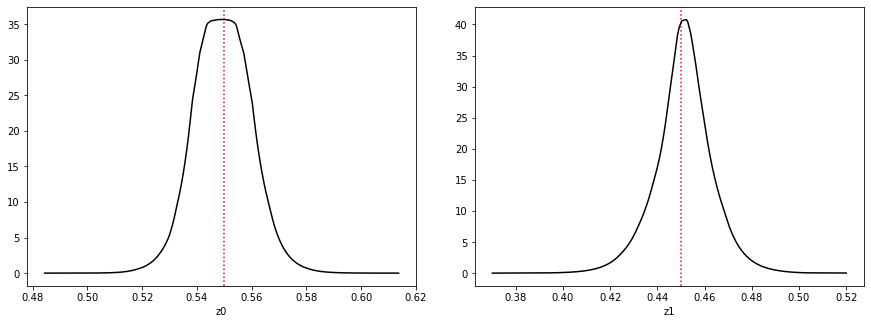

In [25]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys',max_n_points=10000)

In [26]:
re2 = swyft.RatioEstimator(points, combinations = [[0, 1]], device=DEVICE)
re2.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 1e-4])

yshape (shape of features between head and legs): 2
Start training
LR iteration 0
Validation loss: 31.192872911691666
Validation loss: 28.165870800614357
Validation loss: 24.141578644514084
Validation loss: 20.61480124294758
Validation loss: 22.47023233771324
Total epochs: 5
LR iteration 1
Validation loss: 15.992039002478123
Validation loss: 14.70955441147089
Validation loss: 15.726563885807991
Total epochs: 3


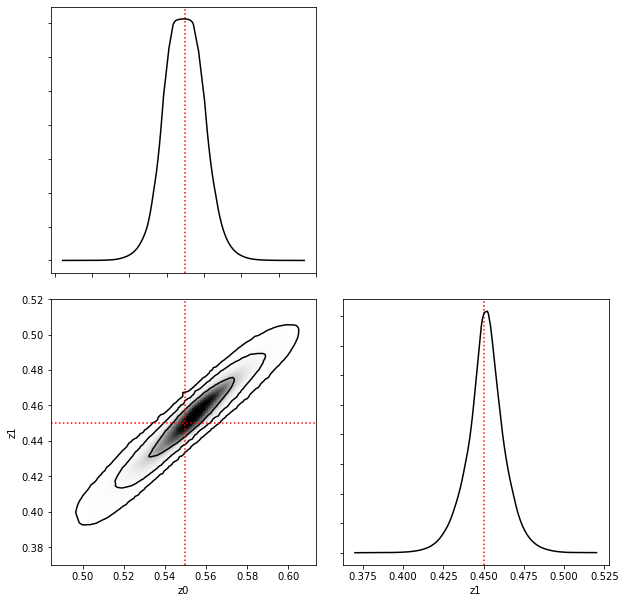

In [27]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 10, max_n_points = 10000)